In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "privbayes"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.020045,-0.044642,-0.010517,0.011544,0.078236,0.057245,0.118591,0.020655,0.075738,0.106617,281.0
1,-0.049105,0.050680,-0.023451,-0.009113,0.052093,0.004949,0.151726,0.155345,0.007027,-0.009362,89.0
2,-0.023677,-0.044642,0.039062,0.001215,-0.020832,0.056619,-0.006584,-0.039493,0.007027,0.048628,292.0
3,-0.060003,0.050680,-0.084886,0.052858,0.085116,-0.089935,0.015505,0.023608,0.013316,-0.030072,122.0
4,-0.023677,-0.044642,0.070319,0.055153,-0.034592,0.001504,-0.043401,0.039106,-0.056158,-0.050783,170.0
5,-0.060003,0.050680,0.036907,-0.049280,0.003935,-0.043589,0.022869,0.017703,0.026714,0.094191,173.0
6,-0.023677,-0.044642,-0.023451,-0.014852,-0.089630,-0.070833,0.030232,0.084863,0.045066,-0.042499,92.0
7,-0.023677,0.050680,0.041218,-0.049280,-0.081374,-0.044215,0.118591,0.036154,0.031815,-0.009362,270.0
8,-0.041840,0.050680,-0.080575,0.079254,-0.020832,-0.002253,0.092820,0.017703,0.050276,0.098333,59.0
9,0.078034,-0.044642,-0.064408,-0.061904,0.008063,0.001191,0.133318,-0.021412,-0.045421,0.048628,252.0


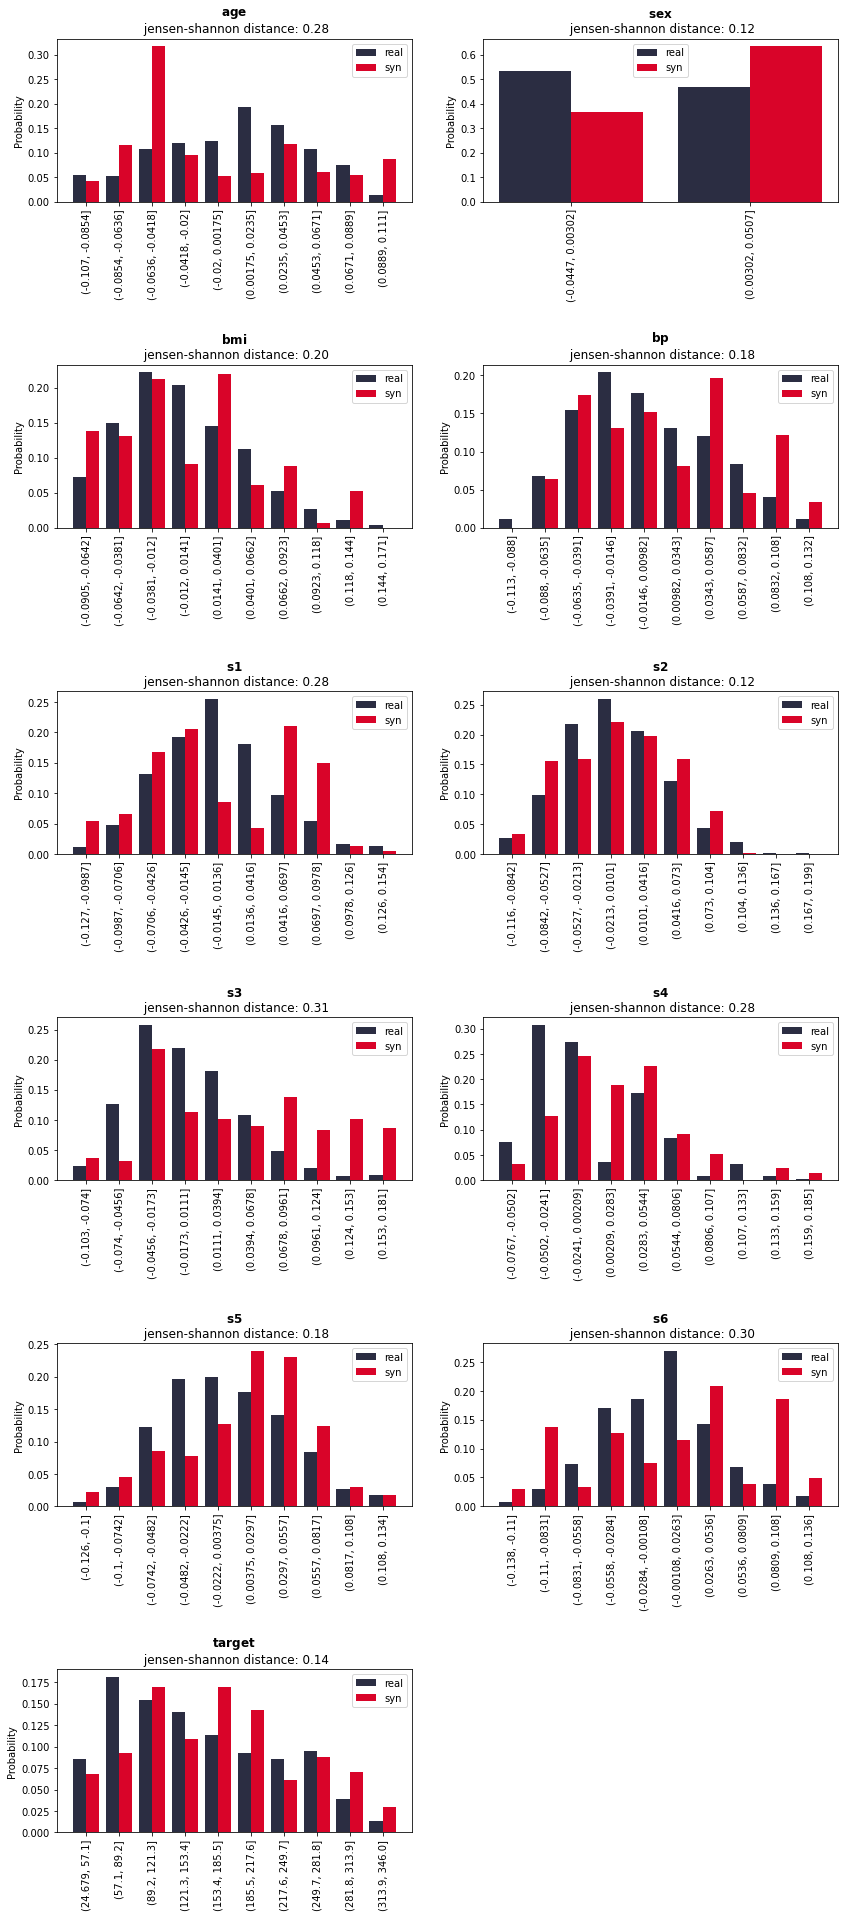

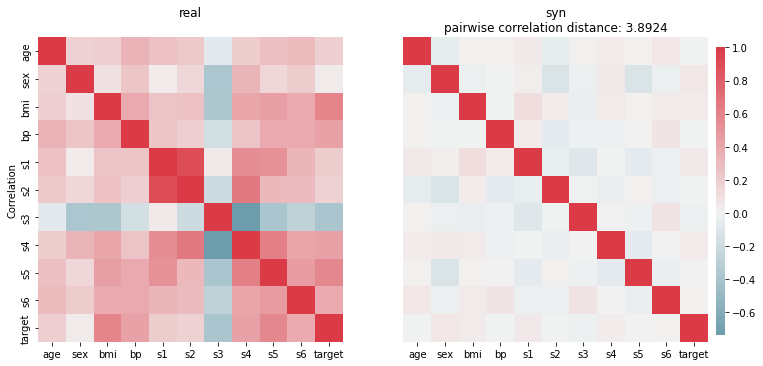

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [8]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [9]:
Benchmarks.print(score)


Plugin : privbayes


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
sanity.common_rows_proportion,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.01
sanity.avg_distance_nearest_neighbor,0.037883,0.09109,0.069345,0.022783,0.079063,0.026604,3,0,0.01
sanity.inlier_probability,0.875566,0.986425,0.918552,0.048559,0.893665,0.05543,3,0,0.01
sanity.outlier_probability,0.002262,0.004525,0.003771,0.001067,0.004525,0.001131,3,0,0.01
statistical.inverse_kl_divergence,0.820078,0.837182,0.826959,0.007372,0.823618,0.008552,3,0,0.02
statistical.kolmogorov_smirnov_test,0.815302,0.823324,0.820239,0.003527,0.82209,0.004011,3,0,0.01
statistical.chi_squared_test,0.521851,0.616757,0.582622,0.04308,0.609257,0.047453,3,0,0.02
statistical.maximum_mean_discrepancy,0.012022,0.014886,0.013332,0.001182,0.013088,0.001432,3,0,0.03
statistical.inverse_cdf_distance,1.606124,1.756976,1.663288,0.066781,1.626765,0.075426,3,0,3.99



[19:50:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
